# Restaurants Review

To read TSV file

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
A=pd.read_csv("F:Downloads/Restaurant_Reviews.tsv",sep='\t')

In [3]:
A

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# Remove Stop words

In [22]:
import re
stop = ["is","the","a","and","but","he","she","it","this","that","was","by","may"]

In [26]:
lines=[]
for i in A.Review:
    words=''
    Q=i.lower()
    Q=re.sub("[^a-z ]","",Q)
    Q=Q.split(" ")
    for j in Q:
        if (j not in stop):
            words= words +" "+j
    lines.append(words)

In [27]:
lines

[' wow loved place',
 ' crust not good',
 ' not tasty texture just nasty',
 ' stopped during late bank holiday off rick steve recommendation loved',
 ' selection on menu great so were prices',
 ' now i am getting angry i want my damn pho',
 ' honeslty didnt taste fresh',
 ' potatoes were like rubber you could tell they had been made up ahead of time being kept under warmer',
 ' fries were great too',
 ' great touch',
 ' service very prompt',
 ' would not go back',
 ' cashier had no care what so ever on what i had to say still ended up being wayyy overpriced',
 ' i tried cape cod ravoli chicken with cranberrymmmm',
 ' i disgusted because i pretty sure human hair',
 ' i shocked because no signs indicate cash only',
 ' highly recommended',
 ' waitress little slow in service',
 ' place not worth your time let alone vegas',
 ' did not like at all',
 ' burrittos blah',
 ' food amazing',
 ' service also cute',
 ' i could care less interior just beautiful',
 ' so they performed',
 ' thats righ

# Use TfidVector

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

In [31]:
X=tf.fit_transform(pd.Series(lines)).toarray()

In [32]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
Y=A.Liked

In [34]:
Y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [36]:
len(tf.get_feature_names())

2034

# Create Keras NN model

In [37]:
from keras.models import Sequential
from keras.layers import Dense

nn=Sequential()
nn.add(Dense(600,input_dim=(2034)))
nn.add(Dense(600,activation='relu'))
nn.add(Dense(1,activation="sigmoid"))

In [38]:
nn.compile(loss='binary_crossentropy',metrics="accuracy")
model=nn.fit(X,Y,validation_split=0.2,epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 48ms/step - loss: 0.5826 - accuracy: 0.6837 - val_loss: 0.4987 - val_accuracy: 0.7550
Epoch 2/20
25/25 [==============================] - 1s 33ms/step - loss: 0.1957 - accuracy: 0.9337 - val_loss: 0.5004 - val_accuracy: 0.7350
Epoch 3/20
25/25 [==============================] - 1s 39ms/step - loss: 0.0522 - accuracy: 0.9837 - val_loss: 0.4380 - val_accuracy: 0.8200
Epoch 4/20
25/25 [==============================] - 1s 33ms/step - loss: 0.0125 - accuracy: 0.9987 - val_loss: 0.6890 - val_accuracy: 0.7700
Epoch 5/20
25/25 [==============================] - 1s 32ms/step - loss: 0.0032 - accuracy: 0.9987 - val_loss: 0.7541 - val_accuracy: 0.7950
Epoch 6/20
25/25 [==============================] - 1s 33ms/step - loss: 8.9919e-04 - accuracy: 1.0000 - val_loss: 0.8293 - val_accuracy: 0.8000
Epoch 7/20
25/25 [==============================] - 1s 40ms/step - loss: 2.4105e-04 - accuracy: 1.0000 - val_loss: 1.0804 - val_accuracy: 0.7550
Epoch

In [39]:
tr=model.history["accuracy"]
ts=model.history['val_accuracy']

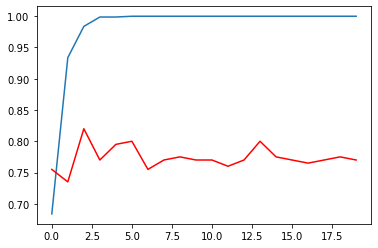

In [40]:
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts,c='red')

# Read Testing tsv file

In [42]:
B=pd.read_csv("F:Downloads/DataSets/rest_reviews_testing.csv",sep="\t")

,Review
0,Tasty and delicious
1,crust is hard
2,yummy....I like Dominos pizza
3,fast service and good taste
4,Good taste
5,Its very delicious... hope it will maintain ta...
6,Food was okay but the cheesy dip provided was ...
7,taste is ok but not satisfied
8,Poor service
9,Good hygiene food delivered by dominos with pr...


# Preprocess testing file

In [58]:
op = []
for i in B.Review:
    q = re.sub("[^a-zA-Z ]","",i)
    op.append(q)

In [62]:
X = tf.transform(op).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Predict the Reviews

In [63]:
pred=nn.predict(X)

1/1 [==============================] - 0s 165ms/step


In [72]:
s=[]
for i in pred:
    if(i>=0.5):
        s.append(1)
    else:
        s.append(0)

In [73]:
s

[1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]

In [74]:
B["like"]=s

# Testing file Reviews output

In [76]:
B

,Review,like
0,Tasty and delicious,1
1,crust is hard,0
2,yummy....I like Dominos pizza,1
3,fast service and good taste,1
4,Good taste,1
5,Its very delicious... hope it will maintain ta...,1
6,Food was okay but the cheesy dip provided was ...,1
7,taste is ok but not satisfied,0
8,Poor service,0
9,Good hygiene food delivered by dominos with pr...,1
